         Date    Product  Sales  Quantity Region
0  01-01-2023  Product A    200         4  North
1  02-01-2023  Product B    150         3  South
2  03-01-2023  Product A    220         5  North
3  04-01-2023  Product C    300         6   East
4  05-01-2023  Product B    180         4   West
Date        0
Product     0
Sales       0
Quantity    0
Region      0
dtype: int64
            Sales   Quantity
count   16.000000  16.000000
mean   237.500000   5.375000
std     64.031242   1.746425
min    150.000000   3.000000
25%    187.500000   4.000000
50%    225.000000   5.500000
75%    302.500000   7.000000
max    340.000000   8.000000
     Product  Sales  Quantity
0  Product A   1350        33
1  Product B    850        17
2  Product C   1600        36


C:\Users\praka_32k187u\AppData\Local\Temp\ipykernel_14268\406383238.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sales'].fillna(df['Sales'].mean(), inplace=True)


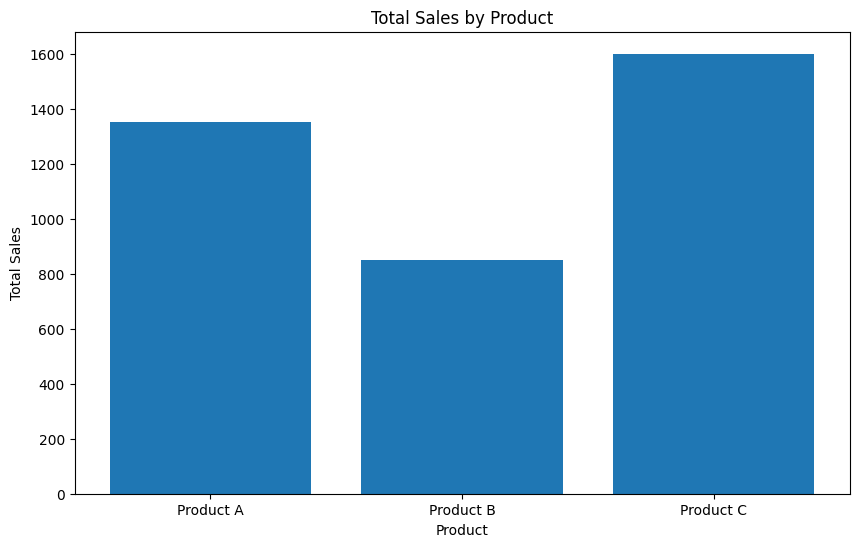

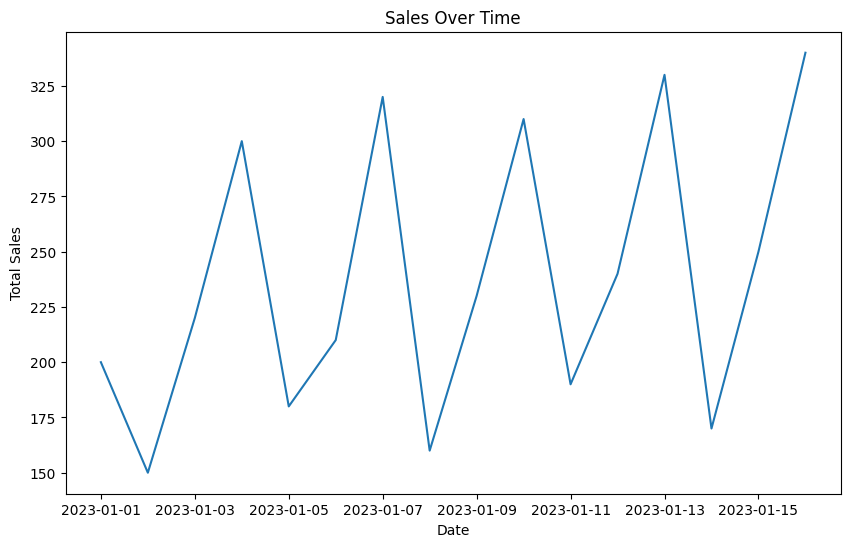

Product  Product A  Product B  Product C
Region                                  
East             0          0       1600
North         1350          0          0
South            0        480          0
West             0        370          0
             Sales  Quantity
Sales     1.000000  0.944922
Quantity  0.944922  1.000000


C:\Users\praka_32k187u\AppData\Local\Temp\ipykernel_14268\406383238.py:29: FutureWarning: The provided callable <function sum at 0x000002257A133B00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table = df.pivot_table(values='Sales', index='Region', columns='Product', aggfunc=np.sum, fill_value=0)


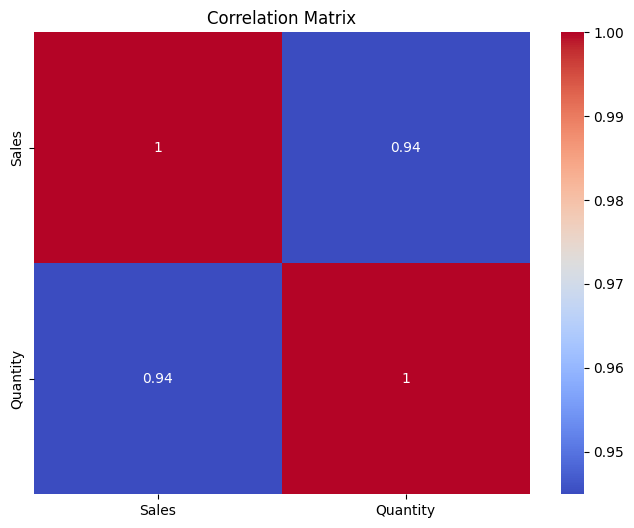

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\praka_32k187u\Downloads\sales_data.xlsx - Sheet1.csv")
print(df.head())
print(df.isnull().sum())
df['Sales'].fillna(df['Sales'].mean(), inplace=True)
df.dropna(subset=['Product', 'Quantity', 'Region'], inplace=True)
print(df.describe())
product_summary = df.groupby('Product').agg({'Sales': 'sum','Quantity': 'sum'}).reset_index()
print(product_summary)
plt.figure(figsize=(10, 6))
plt.bar(product_summary['Product'], product_summary['Sales'])
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product')
plt.show()
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df.dropna(subset=['Date'], inplace=True)
sales_over_time = df.groupby('Date').agg({'Sales': 'sum'}).reset_index()
plt.figure(figsize=(10, 6))
plt.plot(sales_over_time['Date'], sales_over_time['Sales'])
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Over Time')
plt.show()
pivot_table = df.pivot_table(values='Sales', index='Region', columns='Product', aggfunc=np.sum, fill_value=0)
print(pivot_table)
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
